In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def forward(X, W1, b1, W2, b2):
    # linear regression
    Z = X.dot(W1) + b1
    activation = Z * (Z>0)
    Y = activation.dot(W2) + b2
    return Y, activation

def predict(X, W1, b1, W2, b2):
    return forward(X, W1, b1, W2, b2)

def derivative_w2(Z, T, Y):
    return (T - Y).dot(Z)

def derivative_b2(T, Y):
    return (T - Y).sum()

def derivative_w1(X, Z, T, Y, W2):
    dZ = np.outer(T-Y, W2) * (Z > 0)
    return X.T.dot(dZ)

def derivative_b1(Z, T, Y, W2):
    dZ = np.outer(T-Y, W2) * (Z > 0)
    return dZ.sum(axis=0)

def get_cost(T, Y):
    return ((T - Y)**2).mean()

def update(X, Z, T, Y, W1, b1, W2, b2, learning_rate=1e-4):
    gW2 = derivative_w2(Z, T, Y)
    gb2 = derivative_b2(T, Y)
    gW1 = derivative_w1(X, Z, T, Y, W2)
    gb1 = derivative_b1(Z, T, Y, W2)

    W2 += learning_rate * gW2
    b2 += learning_rate * gb2
    W1 += learning_rate * gW1
    b1 += learning_rate * gb1

    return W1, b1, W2, b2

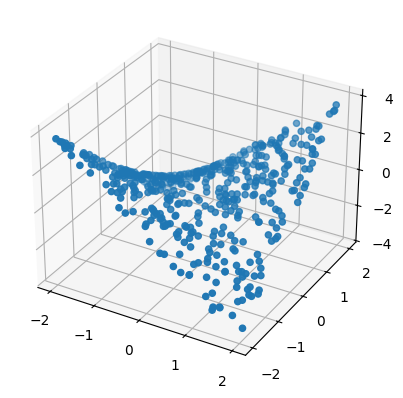

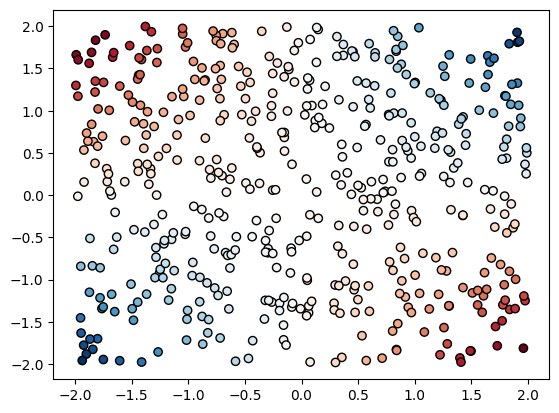

In [7]:
N = 500
X = np.random.random((N, 2))*4 - 2.
Y = X[:, 0] * X[:, 1]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show();

plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="RdBu", edgecolor="k")
plt.show();

In [8]:
D = 2
M = 124

W1 = np.random.randn(D, M) / np.sqrt(D)
b1 = np.zeros(M)
W2 = np.random.randn(M) / np.sqrt(M)
b2 = 0

2.160526417822443
0.08945951174022215
0.0900962572628893
0.09257972084439486
0.09734860376914246
0.10435578590449797
0.11198301926618898
0.11671672369538673


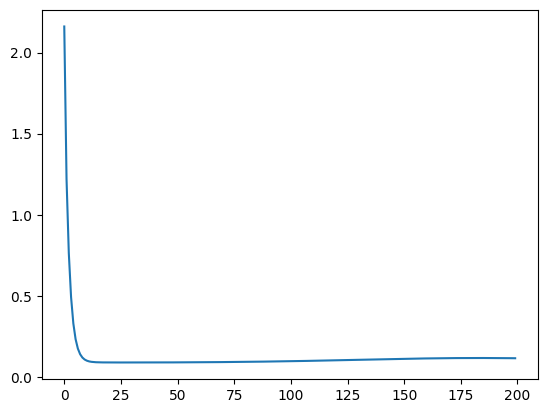

In [9]:
costs = []

for i in range(200):
    Yhat, Z = forward(X, W1, b1, W2, b2)
    W1, b1, W2, b2 = update(X, Z, Y, Yhat, W1, b1, W2, b2)
    cost = get_cost(Y, Yhat)
    costs.append(cost)
    if i % 25 == 0:
        print(cost)
plt.plot(costs)
plt.show();

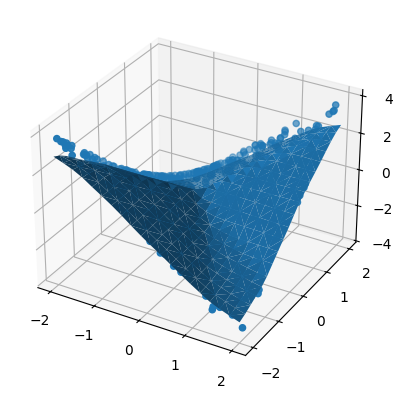

In [11]:
# plot the prediction with the data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], Y)

# surface plot
line = np.linspace(-2, 2, 20)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat, _ = forward(Xgrid, W1, b1, W2, b2)
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], Yhat, linewidth=0.2, antialiased=True)
plt.show();


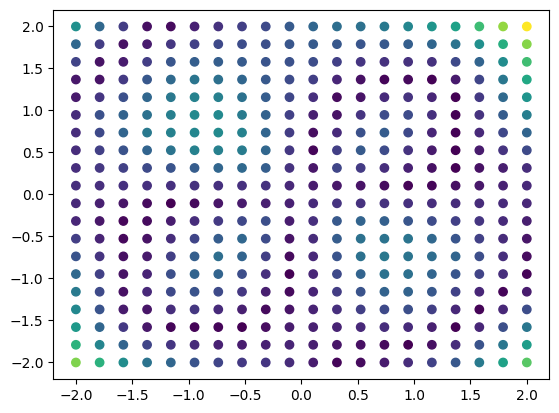

In [12]:
# plot the magnitude of the residuals
Ygrid = Xgrid[:, 0] * Xgrid[:, 1]
R = np.abs(Ygrid - Yhat)

plt.scatter(Xgrid[:, 0], Xgrid[:, 1], c=R)
plt.show();

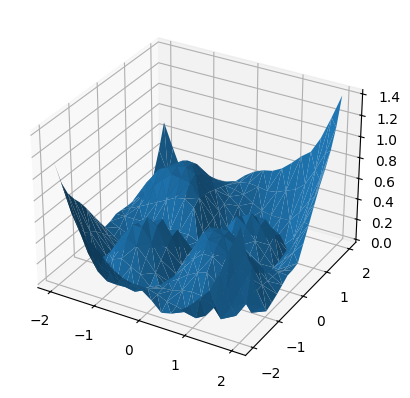

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(Xgrid[:, 0], Xgrid[:, 1], R, linewidth=0.2, antialiased=True)
plt.show();